In [18]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [19]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json

#Import all the necessary CLAW libraries
import create_directory
import CLAW

import warnings

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [20]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [21]:
name_of_project = 'FaceFats'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

One or both of the destination directories 'Projects/FaceFats/o3on' and 'Projects/FaceFats/o2only' do not exist.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [22]:
# Set default values
data_base_name_location = 'lipid_database/Lipid_Database.xlsx'
Project = './Projects/'
Project_Name = 'FaceFats'
Project_Folder_data = Project + Project_Name + '/mzml/'
Project_results = Project + Project_Name + '/results/'
file_name_to_save = 'FaceFats'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/Lipid_Database.xlsx
Project: ./Projects/
Project_Name: FaceFats
Project_Folder_data: ./Projects/FaceFats/mzml/
Project_results: ./Projects/FaceFats/results/
file_name_to_save: FaceFats
tolerance: 0.3
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [23]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [24]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/FaceFats/mzml/11282023_DOD94_F3_WT_cereb_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml/11282023_DOD94_F3_WT_cortex_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml/11282023_DOD94_F3_WT_dienc_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml/11282023_DOD94_F3_WT_hippo_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml/11282023_FAD184_F3_WT_cereb_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml/11282023_FAD184_F3_WT_cortex_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml/11282023_FAD184_F3_WT_dienc_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml/11282023_FAD184_F3_WT_hippo_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml/11282023_FAD184_F4_WT_cereb_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml/11282023_FAD184_F4_WT_cortex_O3on_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzm

In [25]:
df_MRM.head(None)

,Class,Intensity,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition
0,NaN,24597.661739,NaN,584.4,437.3,11282023_DOD94_F3_WT_cereb_O3on_01,584.4 -> 437.3
1,NaN,25330.241772,NaN,612.4,437.3,11282023_DOD94_F3_WT_cereb_O3on_01,612.4 -> 437.3
2,NaN,24767.021721,NaN,622.5,503.4,11282023_DOD94_F3_WT_cereb_O3on_01,622.5 -> 503.4
3,NaN,24404.361713,NaN,624.5,505.4,11282023_DOD94_F3_WT_cereb_O3on_01,624.5 -> 505.4
4,NaN,24768.021744,NaN,626.5,437.3,11282023_DOD94_F3_WT_cereb_O3on_01,626.5 -> 437.3
...,...,...,...,...,...,...,...
14695,TAG,233716.696194,"[TG(57:9),TG(56:2)]_FA18:1",932.9,633.6,12012023_FAD173_M1_5xFAD_liver_O3on_01,932.9 -> 633.6
14696,TAG,49685.523727,"[TG(58:7),TG(57:0)]_FA18:1",950.9,651.6,12012023_FAD173_M1_5xFAD_liver_O3on_01,950.9 -> 651.6
14697,TAG,34257.062469,"[TG(59:13),TG(58:6)]_FA18:1",952.8,653.5,12012023_FAD173_M1_5xFAD_liver_O3on_01,952.8 -> 653.5
14698,TAG,40613.842754,"[TG(59:12),TG(58:5)]_FA18:1",954.8,655.5,12012023_FAD173_M1_5xFAD_liver_O3on_01,954.8 -> 655.5


In [83]:
df_OzESI.head(None)
# df_OzESI.to_csv('FaceFatsOzdf.csv')
# df_OzESI.to_excel('FaceFatsOzdf.xlsx')

,Unnamed: 0,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,3723849,NaN,716.6,571.5,1.727183,41.160004,12012023_DOD73_M2_5xFAD_liver_O3on_01,716.6 -> 571.5
1,3723850,NaN,716.6,571.5,1.771600,41.040005,12012023_DOD73_M2_5xFAD_liver_O3on_01,716.6 -> 571.5
2,3723851,NaN,716.6,571.5,1.816000,41.180004,12012023_DOD73_M2_5xFAD_liver_O3on_01,716.6 -> 571.5
3,3723852,NaN,716.6,571.5,1.860400,41.180004,12012023_DOD73_M2_5xFAD_liver_O3on_01,716.6 -> 571.5
4,3723853,NaN,716.6,571.5,1.904817,41.080002,12012023_DOD73_M2_5xFAD_liver_O3on_01,716.6 -> 571.5
...,...,...,...,...,...,...,...,...
413759,4137608,NaN,956.9,657.6,24.779117,41.080002,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6
413760,4137609,NaN,956.9,657.6,24.823533,40.980003,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6
413761,4137610,NaN,956.9,657.6,24.867933,40.980003,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6
413762,4137611,NaN,956.9,657.6,24.912333,40.960003,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6


In [82]:
df_OzESI = pd.read_csv('Projects/FaceFats/dfs/OzESI/1_10.csv')

The `read_mrm_list()` function is first invoked to read the MRM database from the specified file location and return it as a pandas DataFrame `mrm_database`. Subsequently, the `match_lipids_parser()` function is called to match the detected lipids from the `OzESI_time_df` DataFrame, obtained from the OzESI-MS scans, with the known lipids in the `mrm_database` based on the MRM transitions within the specified `tolerance`. The result is saved in the `df_oz_matched` DataFrame, which now contains matched lipid species from the OzESI-MS data.

In [84]:
mrm_database = CLAW.read_mrm_list(data_base_name_location, deuterated=False)
df_OzESI_matched = CLAW.match_lipids_parser(mrm_database, df_OzESI, tolerance)


/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [85]:
df_OzESI_matched.to_csv('FF_OzMatched_10.csv')
df_OzESI_matched.head(None)

,Class,Lipid,OzESI_Intensity,Parent_Ion,Product_Ion,Retention_Time,Sample_ID,Transition,Unnamed: 0
0,NaN,NaN,41.160004,716.6,571.5,1.727183,12012023_DOD73_M2_5xFAD_liver_O3on_01,716.6 -> 571.5,3723849
1,NaN,NaN,41.040005,716.6,571.5,1.771600,12012023_DOD73_M2_5xFAD_liver_O3on_01,716.6 -> 571.5,3723850
2,NaN,NaN,41.180004,716.6,571.5,1.816000,12012023_DOD73_M2_5xFAD_liver_O3on_01,716.6 -> 571.5,3723851
3,NaN,NaN,41.180004,716.6,571.5,1.860400,12012023_DOD73_M2_5xFAD_liver_O3on_01,716.6 -> 571.5,3723852
4,NaN,NaN,41.080002,716.6,571.5,1.904817,12012023_DOD73_M2_5xFAD_liver_O3on_01,716.6 -> 571.5,3723853
...,...,...,...,...,...,...,...,...,...
413759,TAG,"[TG(59:11),TG(58:4)]_FA18:1",41.080002,956.9,657.6,24.779117,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6,4137608
413760,TAG,"[TG(59:11),TG(58:4)]_FA18:1",40.980003,956.9,657.6,24.823533,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6,4137609
413761,TAG,"[TG(59:11),TG(58:4)]_FA18:1",40.980003,956.9,657.6,24.867933,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6,4137610
413762,TAG,"[TG(59:11),TG(58:4)]_FA18:1",40.960003,956.9,657.6,24.912333,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6,4137611


In [60]:
df_OzESI_matched.tail()

,Class,Lipid,OzESI_Intensity,Parent_Ion,Product_Ion,Retention_Time,Sample_ID,Transition,Unnamed: 0
413756,NaN,NaN,42.040005,814.7,625.5,10.231250,11282023_FAD189_M3_WT_hippo_O3on_01,814.7 -> 625.5,1655039
413757,NaN,NaN,42.020004,814.7,625.5,10.275650,11282023_FAD189_M3_WT_hippo_O3on_01,814.7 -> 625.5,1655040
413758,NaN,NaN,42.120003,814.7,625.5,10.320067,11282023_FAD189_M3_WT_hippo_O3on_01,814.7 -> 625.5,1655041
413759,NaN,NaN,42.040005,814.7,625.5,10.364467,11282023_FAD189_M3_WT_hippo_O3on_01,814.7 -> 625.5,1655042
413760,NaN,NaN,41.960003,814.7,625.5,10.408867,11282023_FAD189_M3_WT_hippo_O3on_01,814.7 -> 625.5,1655043


In [86]:
df_OzESI_matched = pd.read_csv('FF_OzMatched_full.csv')
df_OzESI_matched.head(None)

,Unnamed: 0,Class,Lipid,OzESI_Intensity,Parent_Ion,Product_Ion,Retention_Time,Sample_ID,Transition,Unnamed: 0.1
0,0,NaN,NaN,42.920002,584.4,437.3,0.044183,11282023_DOD94_F3_WT_cereb_O3on_01,584.4 -> 437.3,0
1,1,NaN,NaN,42.540005,584.4,437.3,0.088567,11282023_DOD94_F3_WT_cereb_O3on_01,584.4 -> 437.3,1
2,2,NaN,NaN,43.180004,584.4,437.3,0.132967,11282023_DOD94_F3_WT_cereb_O3on_01,584.4 -> 437.3,2
3,3,NaN,NaN,42.780003,584.4,437.3,0.177367,11282023_DOD94_F3_WT_cereb_O3on_01,584.4 -> 437.3,3
4,4,NaN,NaN,42.720001,584.4,437.3,0.221783,11282023_DOD94_F3_WT_cereb_O3on_01,584.4 -> 437.3,4
...,...,...,...,...,...,...,...,...,...,...
4137608,413759,TAG,"[TG(59:11),TG(58:4)]_FA18:1",41.080002,956.9,657.6,24.779117,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6,4137608
4137609,413760,TAG,"[TG(59:11),TG(58:4)]_FA18:1",40.980003,956.9,657.6,24.823533,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6,4137609
4137610,413761,TAG,"[TG(59:11),TG(58:4)]_FA18:1",40.980003,956.9,657.6,24.867933,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6,4137610
4137611,413762,TAG,"[TG(59:11),TG(58:4)]_FA18:1",40.960003,956.9,657.6,24.912333,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6,4137611


### Lipidomics Data Processing and Double-Bond Location Analysis

The code block initiates the data refining process by filtering the retention time from the `df_oz_matched` DataFrame using the `filter_rt()` function and concatenating this DataFrame with `df_matched` via `concat_dataframes()`. The resulting DataFrame is then enriched by adding the positional isomers and lipid information for specified double bond positions (here, 7, 9, 12) through the `DB_Position_df()` and `add_lipid_info()` functions respectively. Following sorting by 'Sample_ID' and 'Product_Ion', the `calculate_intensity_ratio()` function is employed to calculate and append intensity ratios to the DataFrame. Afterward, lipid species in the 'Lipid' column are sorted by their second triacylglycerol (TG) components. Lastly, the `filter_highest_ratios()` function is used to filter and keep rows with the highest intensity ratios, resulting in a more concise and useful DataFrame `df_matched_6`.

In [180]:
# Filter retention time from df_OzESI_matched 
df_OzESI_1_filtered = CLAW.filter_rt(df_OzESI_matched, min_rt=11, max_rt=12, min_intensity=300)

# Copy the filtered dataframe
df_OzESI_1_filtered_copy = df_OzESI_1_filtered.copy()

# Add double bond position
df_OzESI_2_DB_pos = CLAW.calculate_DB_Position(df_OzESI_1_filtered_copy, db_pos_list=[7,9,10,12])
print(df_OzESI_2_DB_pos)
#Make a new column for Labels of n-#
df_OzESI_2_DB_pos['db_pos'] = ''
db_pos_list = [7, 9, 10, 12]
# Match db position to the n-# label
df_OzESI_3_DB_pos_matched = CLAW.add_lipid_info(df_OzESI_2_DB_pos, db_pos_list, tolerance=0.3)

# Sort OzESI data by Sample_ID and Product_Ion
df_OzESI_3_DB_pos_sorted = df_OzESI_3_DB_pos_matched.sort_values(by=['Sample_ID','Product_Ion'])




#### RATIO CODE
# # Make a copy of the sorted dataframe
# df_OzESI_4_ratio = df_OzESI_3_DB_pos_sorted.copy()
# # Add a column for Ratios
# # df_OzESI_4_ratio['Ratio'] = None

# # Calculate Ratios
# df_OzESI_4_ratio = CLAW.calculate_intensity_ratio(df_OzESI_4_ratio)

# # Make a copy, sort lipids ratios for Lipids. Save in final dataframe df_OzESI_ratio_final
# df_OzESI_4_ratio_sort = df_OzESI_4_ratio.copy()

# df_OzESI_4_ratio_sort['Lipid'] = df_OzESI_4_ratio_sort['Lipid'].apply(CLAW.sort_by_second_tg)
# df_OzESI_5_ratio_final = CLAW.filter_highest_ratio(df_OzESI_4_ratio_sort)


    Unnamed: 0 Class                       Lipid  OzESI_Intensity  Parent_Ion  \
0       237437   TAG           [TG(52:6)]_FA18:2            601.0       868.8   
1        43241   NaN                         NaN            503.0       786.7   
2        77021   TAG           [TG(52:6)]_FA18:2            379.0       868.8   
3       191348   NaN                         NaN            312.0       692.6   
4       191910   NaN                         NaN            684.0       694.6   
..         ...   ...                         ...              ...         ...   
65      209642   NaN                         NaN            324.0       812.8   
66      228785   TAG  [TG(52:7),TG(51:0)]_FA18:1            429.0       866.8   
67      335177   NaN                         NaN            439.0       692.6   
68      338548   NaN                         NaN            326.0       718.6   
69      344756   NaN                         NaN            311.0       746.6   

    Product_Ion  Retention_

In [181]:
unique_lipids = df_OzESI_3_DB_pos_sorted['Lipid'].unique()
sorted_unique_lipids = sorted(unique_lipids)
for lipid in sorted_unique_lipids:
    print(lipid)
df_OzESI_3_DB_pos_sorted.head(None)

[TG(42:2)]_FA18:1 | DG(44:9),DG(43:2)_C18:1
[TG(45:4)]_FA16:1
[TG(52:5)]_FA16:1
[TG(52:6)]_FA18:2
[TG(52:7),TG(51:0)]_FA18:1
[TG(54:6)]_FA18:1
[TG(55:11),TG(54:4)]_FA18:1
[TG(56:11),TG(55:4)]_FA18:1


,Unnamed: 0,Class,Lipid,OzESI_Intensity,Parent_Ion,Product_Ion,Retention_Time,Sample_ID,Transition,Unnamed: 0.1,n-7,n-9,n-10,n-12,db_pos
0,237437,TAG,[TG(52:6)]_FA18:2,601.0,868.8,571.5,10.93,11282023_DOD94_F3_WT_dienc_O3on_01,868.8 -> 571.5,237437,786.8,758.8,744.8,716.8,
2,77021,TAG,[TG(52:6)]_FA18:2,379.0,868.8,571.5,10.84,11282023_FAD184_F3_WT_cortex_O3on_01,868.8 -> 571.5,490782,786.8,758.8,744.8,716.8,
70,43241,NaN,[TG(52:6)]_FA18:2,503.0,786.7,597.5,10.86,11282023_FAD184_F3_WT_cortex_O3on_01,786.7 -> 597.5,457002,704.7,676.7,662.7,634.7,n-7
71,43241,NaN,[TG(52:6)]_FA18:2,503.0,786.7,597.5,10.86,11282023_FAD184_F3_WT_cortex_O3on_01,786.7 -> 597.5,457002,704.7,676.7,662.7,634.7,n-7
72,43241,NaN,[TG(52:6)]_FA18:2,503.0,786.7,597.5,10.86,11282023_FAD184_F3_WT_cortex_O3on_01,786.7 -> 597.5,457002,704.7,676.7,662.7,634.7,n-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,335177,NaN,[TG(45:4)]_FA16:1,439.0,692.6,503.4,10.39,12012023_FAD173_M1_5xFAD_liver_O3on_01,692.6 -> 503.4,4059026,610.6,582.6,568.6,540.6,n-7
246,335177,NaN,[TG(45:4)]_FA16:1,439.0,692.6,503.4,10.39,12012023_FAD173_M1_5xFAD_liver_O3on_01,692.6 -> 503.4,4059026,610.6,582.6,568.6,540.6,n-7
247,335177,NaN,[TG(45:4)]_FA16:1,439.0,692.6,503.4,10.39,12012023_FAD173_M1_5xFAD_liver_O3on_01,692.6 -> 503.4,4059026,610.6,582.6,568.6,540.6,n-7
248,335177,NaN,[TG(45:4)]_FA16:1,439.0,692.6,503.4,10.39,12012023_FAD173_M1_5xFAD_liver_O3on_01,692.6 -> 503.4,4059026,610.6,582.6,568.6,540.6,n-7


In [171]:
df_OzESI_3_DB_pos_sorted.to_csv('FF_RT178_188.csv')

In [124]:
from plot import printed_ratio

# Assuming df_OzESI_ratio_sort is already defined in your notebook
printed_ratio(df_OzESI_4_ratio_sort)


Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cereb_O3on_01, db_pos: n-9, Ratio: 0.1657142857142857
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cereb_O3on_01, db_pos: n-9, Ratio: 0.1657142857142857
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cereb_O3on_01, db_pos: n-9, Ratio: 0.1657142857142857
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cereb_O3on_01, db_pos: n-9, Ratio: 0.1657142857142857
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cereb_O3on_01, db_pos: n-9, Ratio: 0.1657142857142857
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cereb_O3on_01, db_pos: n-9, Ratio: 0.1657142857142857
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cortex_O3on_01, db_pos: n-9, Ratio: 0.12932551319648095
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cortex_O3on_01, db_pos: n-9, Ratio: 0.12932551319648095
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cortex

### Previewing Processed Lipidomics Data

This cell provides a snapshot of the fully processed and enriched lipidomics data set. At this stage, the dataframe includes the integrated information of lipid identities, their specific double-bond locations, and other pertinent characteristics. This prepared data is now ready to be exported for subsequent exploratory and statistical analyses, including visualization and inferential statistics.

In [125]:
unique_lipids = df_OzESI_5_ratio_final['Lipid'].unique()
sorted_unique_lipids = sorted(unique_lipids)
for lipid in sorted_unique_lipids:
    print(lipid)
df_OzESI_5_ratio_final.head(None)

DG(43:2)_C18:1
TG(51:0)]_FA18:1
TG(54:3)]_FA18:1
TG(54:4)]_FA18:1
TG(55:4)]_FA18:1
[TG(45:3)]_FA16:1
[TG(45:4)]_FA16:1
[TG(52:5)]_FA16:1
[TG(52:6)]_FA18:2
[TG(54:6)]_FA18:1


,Unnamed: 0,Class,Lipid,OzESI_Intensity,Parent_Ion,Product_Ion,Retention_Time,Sample_ID,Transition,Unnamed: 0.1,n-7,n-9,n-10,n-12,db_pos,Ratio
1,237437,TAG,[TG(52:6)]_FA18:2,601.0,868.8,571.5,10.93,11282023_DOD94_F3_WT_dienc_O3on_01,868.8 -> 571.5,237437,786.8,758.8,744.8,716.8,,NaN
3,77021,TAG,[TG(52:6)]_FA18:2,379.0,868.8,571.5,10.84,11282023_FAD184_F3_WT_cortex_O3on_01,868.8 -> 571.5,490782,786.8,758.8,744.8,716.8,,NaN
186,43241,NaN,[TG(52:6)]_FA18:2,503.0,786.7,597.5,10.86,11282023_FAD184_F3_WT_cortex_O3on_01,786.7 -> 597.5,457002,704.7,676.7,662.7,634.7,n-7,NaN
189,43241,NaN,[TG(54:6)]_FA18:1,503.0,786.7,597.5,10.86,11282023_FAD184_F3_WT_cortex_O3on_01,786.7 -> 597.5,457002,704.7,676.7,662.7,634.7,n-9,NaN
260,222876,NaN,TG(54:4)]_FA18:1,360.0,790.7,601.5,10.86,11282023_FAD185_M4_WT_cereb_O3on_01,790.7 -> 601.5,1050398,708.7,680.7,666.7,638.7,n-9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,365605,NaN,[TG(52:5)]_FA16:1,4522.0,788.7,599.5,11.53,12012023_FAD173_M1_5xFAD_liver_O3on_01,788.7 -> 599.5,4089454,706.7,678.7,664.7,636.7,n-7,NaN
183,398259,TAG,[TG(52:6)]_FA18:2,15069.0,868.8,571.5,11.51,12012023_FAD173_M1_5xFAD_liver_O3on_01,868.8 -> 571.5,4122108,786.8,758.8,744.8,716.8,,NaN
1130,364478,NaN,[TG(52:6)]_FA18:2,7542.0,786.7,597.5,11.48,12012023_FAD173_M1_5xFAD_liver_O3on_01,786.7 -> 597.5,4088327,704.7,676.7,662.7,634.7,n-7,NaN
185,402199,TAG,[TG(54:6)]_FA18:1,1293.0,896.8,597.5,11.46,12012023_FAD173_M1_5xFAD_liver_O3on_01,896.8 -> 597.5,4126048,814.8,786.8,772.8,744.8,,NaN


In [119]:

# Replace TAG with TG and DAG with DG in 'Class' and 'Lipid' columns
df_OzESI_5_ratio_final['Class'] = df_OzESI_5_ratio_final['Class'].replace({'TAG': 'TG', 'DAG': 'DG'})
df_OzESI_5_ratio_final['Lipid'] = df_OzESI_5_ratio_final['Lipid'].str.replace('TAG', 'TG').str.replace('DAG', 'DG')

# Rename the 'Parent_Ion' column to 'Precursor_Ion'
df_OzESI_5_ratio_final = df_OzESI_5_ratio_final.rename(columns={'Parent_Ion': 'Precursor_Ion'})

# Round the 'Ratio' column to 2 decimal places
df_OzESI_5_ratio_final['Ratio'] = df_OzESI_5_ratio_final['Ratio'].round(2)



# #df_OzESI df to csv and excel file
df_OzESI_5_ratio_final.to_csv('FF_503181_545181_566181.csv', index=False)
# df_OzESI_5_ratio_final.to_excel('CaitlinPaper_1000_blank.xlsx', index=False)
df_OzESI_5_ratio_final.head(None)

,Unnamed: 0,Class,Lipid,OzESI_Intensity,Precursor_Ion,Product_Ion,Retention_Time,Sample_ID,Transition,Unnamed: 0.1,n-7,n-9,n-12,db_pos,Ratio
0,11556,TAG | DAG,DG(43:2)_C18:1,595.0,736.6,437.3,13.23,11282023_DOD94_F3_WT_cereb_O3on_01,736.6 -> 437.3,11556,654.6,626.6,584.6,,NaN
1124,37455,NaN,TG(54:4)]_FA16:1,2268.0,790.7,601.5,13.26,11282023_DOD94_F3_WT_cereb_O3on_01,790.7 -> 601.5,37455,708.7,680.7,638.7,n-9,NaN
7,74052,TG,TG(54:4)]_FA18:1,278.0,900.8,601.5,13.33,11282023_DOD94_F3_WT_cereb_O3on_01,900.8 -> 601.5,74052,818.8,790.8,748.8,,NaN
1086,37455,NaN,TG(54:4)]_FA18:1,2268.0,790.7,601.5,13.26,11282023_DOD94_F3_WT_cereb_O3on_01,790.7 -> 601.5,37455,708.7,680.7,638.7,n-9,NaN
8,78554,TG,TG(55:0)]_FA18:1,547.0,922.9,623.6,13.24,11282023_DOD94_F3_WT_cereb_O3on_01,922.9 -> 623.6,78554,840.9,812.9,770.9,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23135,379739,NaN,[TG(54:6)]_FA18:1,458.0,814.7,597.5,14.14,12012023_FAD173_M1_5xFAD_liver_O3on_01,814.7 -> 597.5,4103588,732.7,704.7,662.7,n-7,NaN
23176,380281,NaN,[TG(56:6)]_FA18:1,3192.0,814.7,625.5,13.21,12012023_FAD173_M1_5xFAD_liver_O3on_01,814.7 -> 625.5,4104130,732.7,704.7,662.7,n-9,8.23
22805,353830,NaN,[TG(56:6)]_FA18:1,405.0,772.6,583.4,13.66,12012023_FAD173_M1_5xFAD_liver_O3on_01,772.6 -> 583.4,4077679,690.6,662.6,620.6,n-12,NaN
979,409010,TG,[TG(56:6)]_FA18:1,4488.0,924.8,625.5,13.90,12012023_FAD173_M1_5xFAD_liver_O3on_01,924.8 -> 625.5,4132859,842.8,814.8,772.8,,NaN


### Lipidomic OzESI Data Visualization

This section presents the visual representation of the lipidomic OzESI data, focusing on the ratio analysis of isomeric lipids based on their double bond location. By default, the visualization emphasizes the n-9/n-7 ratios, but the configuration can be tailored to accommodate any specific double bond location on a lipid. Select the directory where the plots will be saved.

In [16]:
import plot
import re

def lipid_sort_key(lipid):
    # Extract numbers from the lipid string using regex
    matches = re.findall(r'(\d+)', lipid)
    
    # Extract the numbers and return a tuple for sorting
    if len(matches) >= 2:
        return (int(matches[0]), int(matches[1]))
    elif len(matches) == 1:
        return (int(matches[0]), 0)
    else:
        return (0, 0)  # Default return if no match


# Create the "Plots" directory if it doesn't exist
os.makedirs("Projects/FaceFats/plots/heatmap/", exist_ok=True)
#select project
project = 'Projects/FaceFats/'
# select project folder
plot_folder = 'plots/heatmap/'
# Copy the dataframe to df_plot for plotting
df_plot = df_OzESI_5_ratio_final.copy()
df_plot = df_plot.sort_values(by='Lipid', key=lambda x: x.map(lipid_sort_key))
df_plot = df_plot[~df_plot['Lipid'].str.contains(":0")]

# Define color mappings for Lipid patterns
color_mapping = {
    '50': 'red',
    '51': 'brown',
    '52': 'blue',
    '53': 'purple',
    '54': 'green',
}

# Specify output directory
output_directory = "Projects/FaceFats/plots/heatmap/"

# Plot the ratios with the plot_ratios function from the plot module
plot.plot_ratio(df_plot, color_mapping, output_directory, ratio_threshold=0.5)

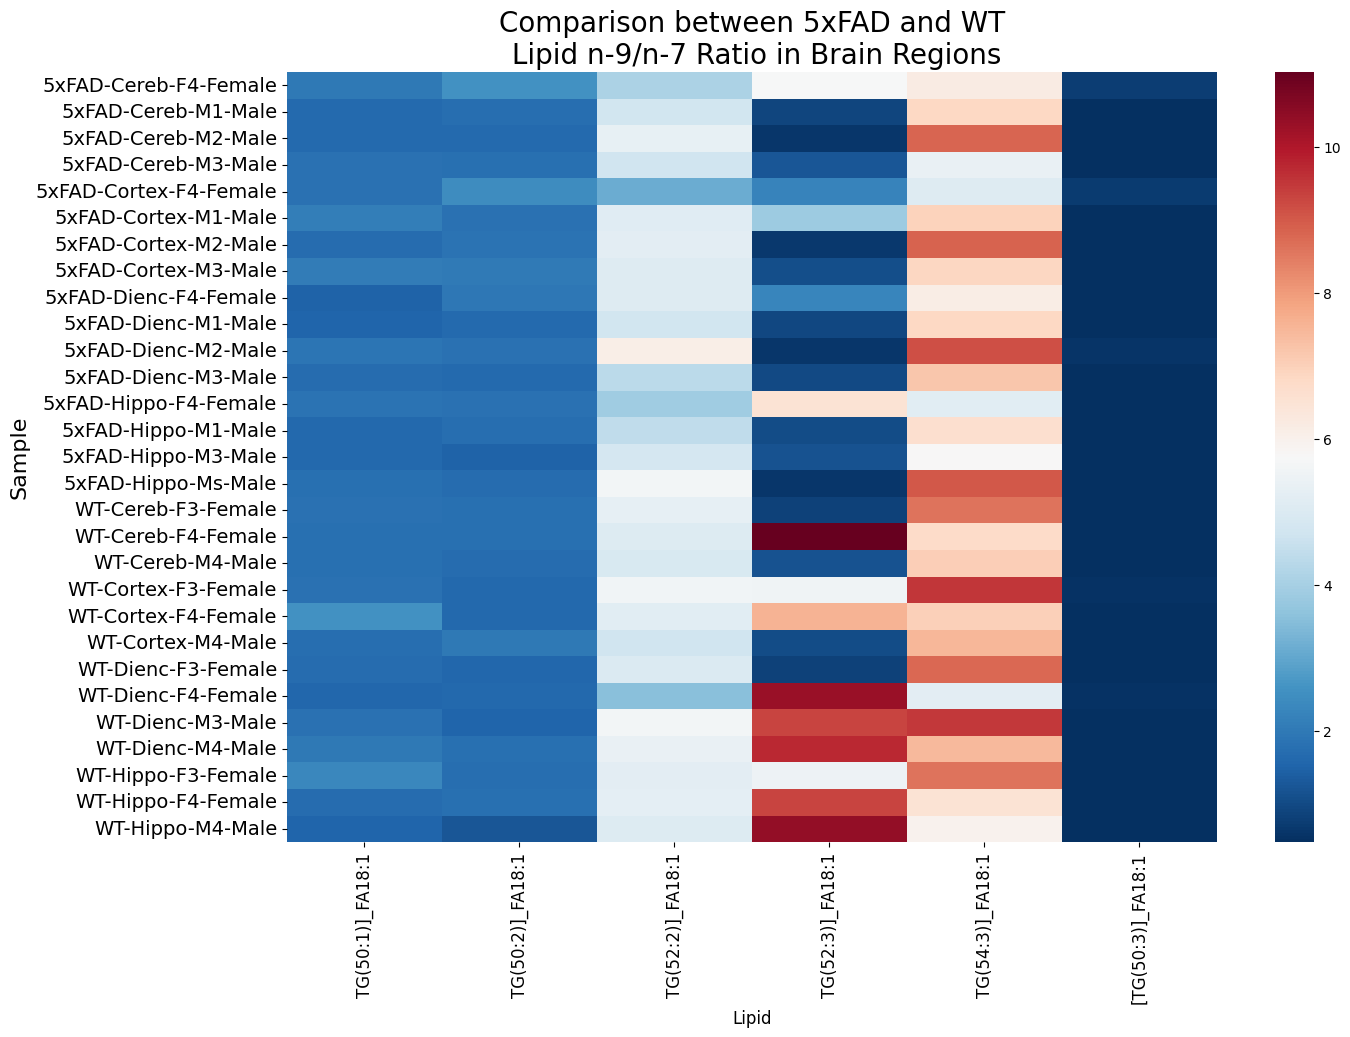

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_OzESI_5_ratio_final is already defined

def label_brain_region(sample_id):
    brain_regions = ['Cereb', 'Cortex', 'Dienc', 'Hippo']
    for region in brain_regions:
        if region.lower() in sample_id.lower():
            return region
    return ""

def label_sex(sample_id):
    sexes = ['F1', 'F2', 'F3', 'F4', 'M1', 'M2', 'M3', 'M4','Ms']
    for sex in sexes:
        if sex in sample_id:
            return sex
    return ""

def determine_gender(sex_label):
    if sex_label.startswith('F'):
        return 'Female'
    elif sex_label.startswith('M'):
        return 'Male'
    return ""


def determine_genotype(sample_id):
    if '5xfad' in sample_id.lower():
        return '5xFAD'
    elif 'wt' in sample_id.lower():
        return 'WT'
    return ""
####
# Copy df_OzESI_5_ratio_final to df_heatmap
df_heatmap = df_OzESI_5_ratio_final.copy()

df_heatmap['Sample_ID'] = df_heatmap['Sample_ID'].str.replace('-', '_')
####


#drop values in column Ratio that are NaN
df_heatmap = df_heatmap.dropna(subset=['Ratio'])
#drop sample_id string = blank
df_heatmap = df_heatmap[df_heatmap['Sample_ID'] != 'blank']
#drop lipid 54:4 52:4 and 54:5 within the string
df_heatmap = df_heatmap[~df_heatmap['Lipid'].str.contains('54:4|52:4|54:5')]

#split 5xFAD vs WT
df_heatmap['Group'] = df_heatmap['Sample_ID'].apply(determine_group)

df_heatmap['Brain_Region'] = df_heatmap['Sample_ID'].apply(label_brain_region)
df_heatmap['Sex_Label'] = df_heatmap['Sample_ID'].apply(label_sex)
df_heatmap['Gender'] = df_heatmap['Sex_Label'].apply(determine_gender)
df_heatmap['Genotype'] = df_heatmap['Sample_ID'].apply(determine_genotype)
df_heatmap.head(None)



# Group by Brain_Region, Sex_Label, Gender, and Lipid. Then, aggregate the Ratio values (e.g., mean value).
grouped_data = df_heatmap.groupby(['Genotype','Brain_Region', 'Sex_Label', 'Gender', 'Lipid']).agg({'Ratio': 'mean'}).reset_index()

# Pivot the table to prepare it for the heatmap.
heatmap_data = grouped_data.pivot_table(index=['Genotype','Brain_Region', 'Sex_Label', 'Gender'], columns='Lipid', values='Ratio')


# Determine the location for the dividing line between 5xFAD and WT
dividing_line_position = len(heatmap_data.loc['5xFAD'])


# Display the heatmap.
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='RdBu_r', annot=False, fmt=".2f")
plt.title('Comparison between 5xFAD and WT\n Lipid n-9/n-7 Ratio in Brain Regions', fontsize=20)
# Adjust the x and y axis label size
plt.xlabel('Lipid', fontsize=12)
plt.ylabel('Sample', fontsize=16)

# Adjust the x and y axis tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)



# # Calculate dividing lines for 5xFAD
# dividing_lines_5xFAD = [
#     len(heatmap_data.loc[('5xFAD', 'Cereb')]),
#     len(heatmap_data.loc[('5xFAD', 'Cereb')]) + len(heatmap_data.loc[('5xFAD', 'Cortex')]),
#     len(heatmap_data.loc[('5xFAD', 'Cereb')]) + len(heatmap_data.loc[('5xFAD', 'Cortex')]) + len(heatmap_data.loc[('5xFAD', 'Dienc')])
# ]

# # Calculate starting point for WT
# start_WT = 16

# # Calculate dividing lines for WT
# dividing_lines_WT = [
#     start_WT + len(heatmap_data.loc[('WT', 'Cereb')]),
#     start_WT + len(heatmap_data.loc[('WT', 'Cereb')]) + len(heatmap_data.loc[('WT', 'Cortex')]),
#     start_WT + len(heatmap_data.loc[('WT', 'Cereb')]) + len(heatmap_data.loc[('WT', 'Cortex')]) + len(heatmap_data.loc[('WT', 'Dienc')])
# ]

# # Draw dividing lines for both 5xFAD and WT
# for line in dividing_lines_5xFAD + dividing_lines_WT:
#     plt.axhline(y=line, color='red', linestyle='--')


# Rotate the x-axis labels
plt.xticks(rotation=90)


# # Add a dividing line between 5xFAD and WT
# plt.axhline(y=dividing_line_position, color='black', linestyle='-')

# #save as png
# plt.savefig('Projects/04_29_23/Plots/Ratio/CaitlinPaper_brainRegion_n9n7Ratios_withoutLine.png', dpi=300, bbox_inches='tight')

plt.show()


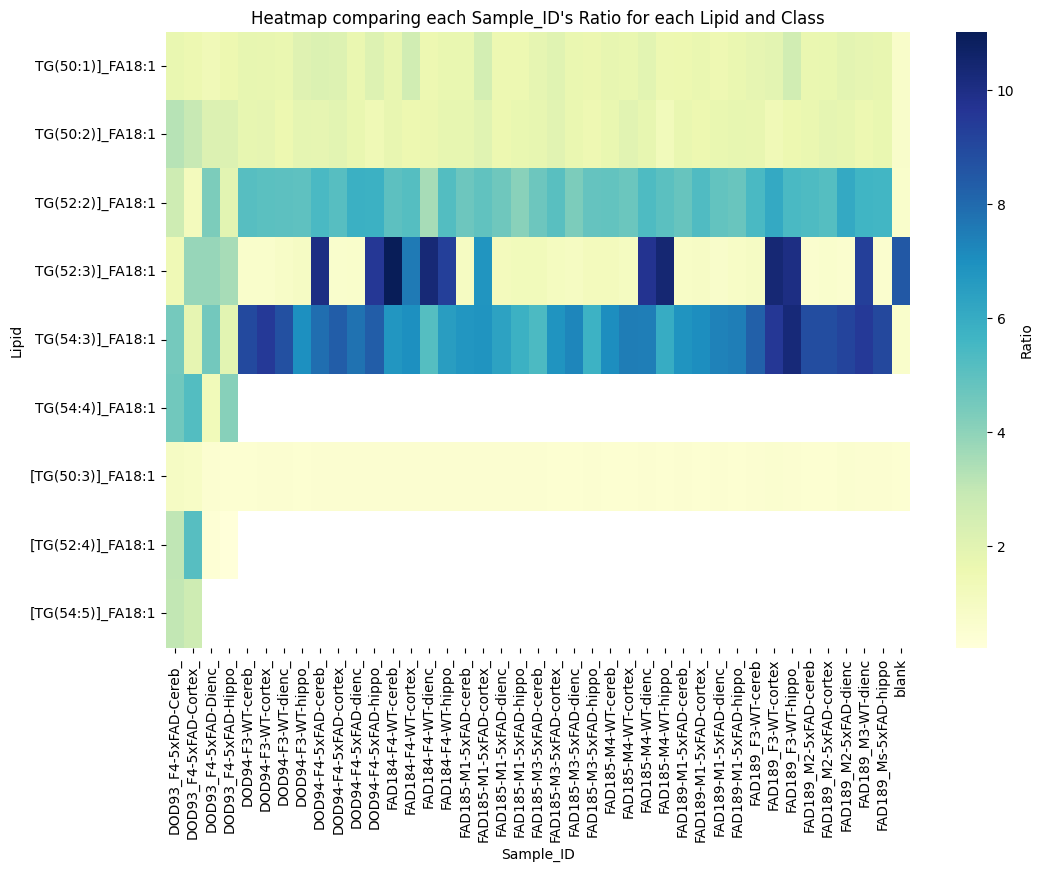

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_OzESI_5_ratio_final is already defined

# Filling NaN values in 'Class' column with a placeholder for visualization purposes
#drop 54:4 52:4 and 54:5 from the df call the new df df_heatmap


# Pivot the dataframe
pivot_df = df_OzESI_5_ratio_final.pivot_table(index=['Lipid'], columns='Sample_ID', values='Ratio')

# Plotting without annotations
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Ratio'})
plt.title('Heatmap comparing each Sample_ID\'s Ratio for each Lipid and Class')
plt.show()


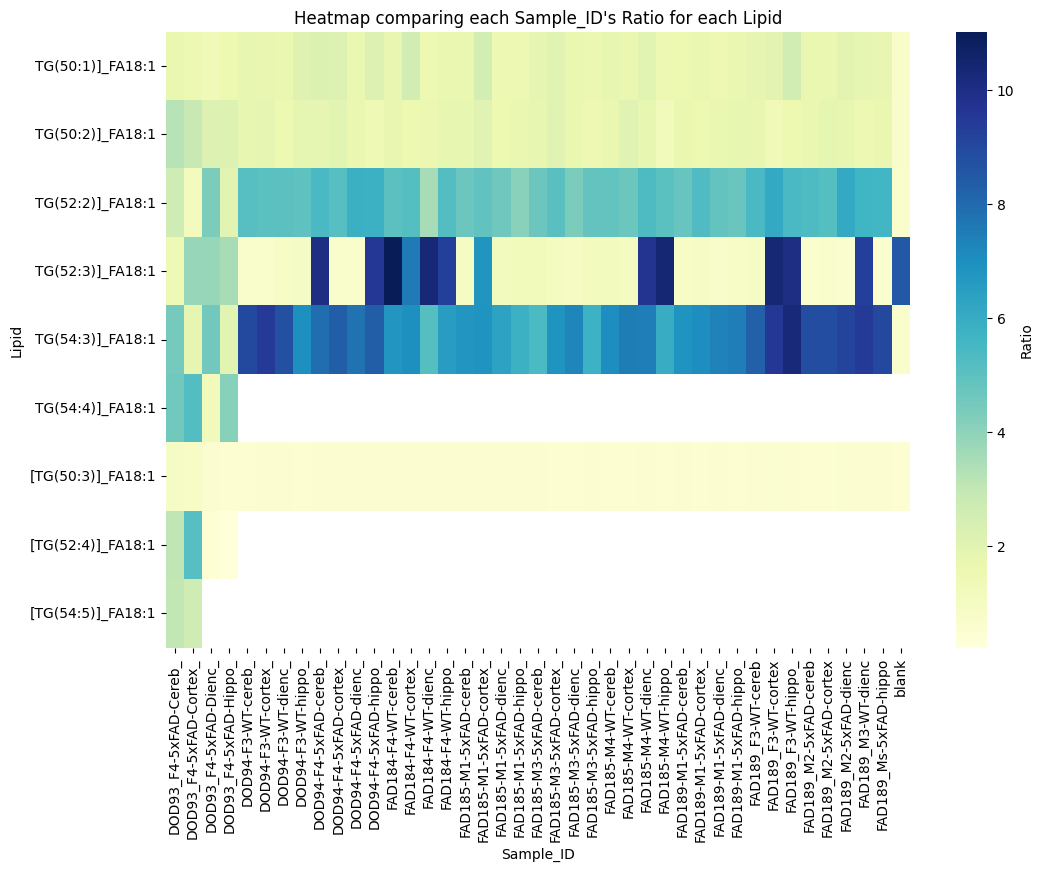

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_OzESI_5_ratio_final is already defined

# Copy df_OzESI_5_ratio_final to df_heatmap
df_heatmap = df_OzESI_5_ratio_final.copy()

# Drop '_TG18-1_o3on' from the Sample_ID in df_heatmap
df_heatmap['Sample_ID'] = df_heatmap['Sample_ID'].str.replace('_TG18-1_o3on', '')

# Pivot the dataframe
pivot_df = df_heatmap.pivot_table(index=['Lipid'], columns='Sample_ID', values='Ratio')

# Plotting without annotations
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Ratio'})
plt.title('Heatmap comparing each Sample_ID\'s Ratio for each Lipid')
plt.show()


/tmp/ipykernel_2985/4105498573.py:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2985/4105498573.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



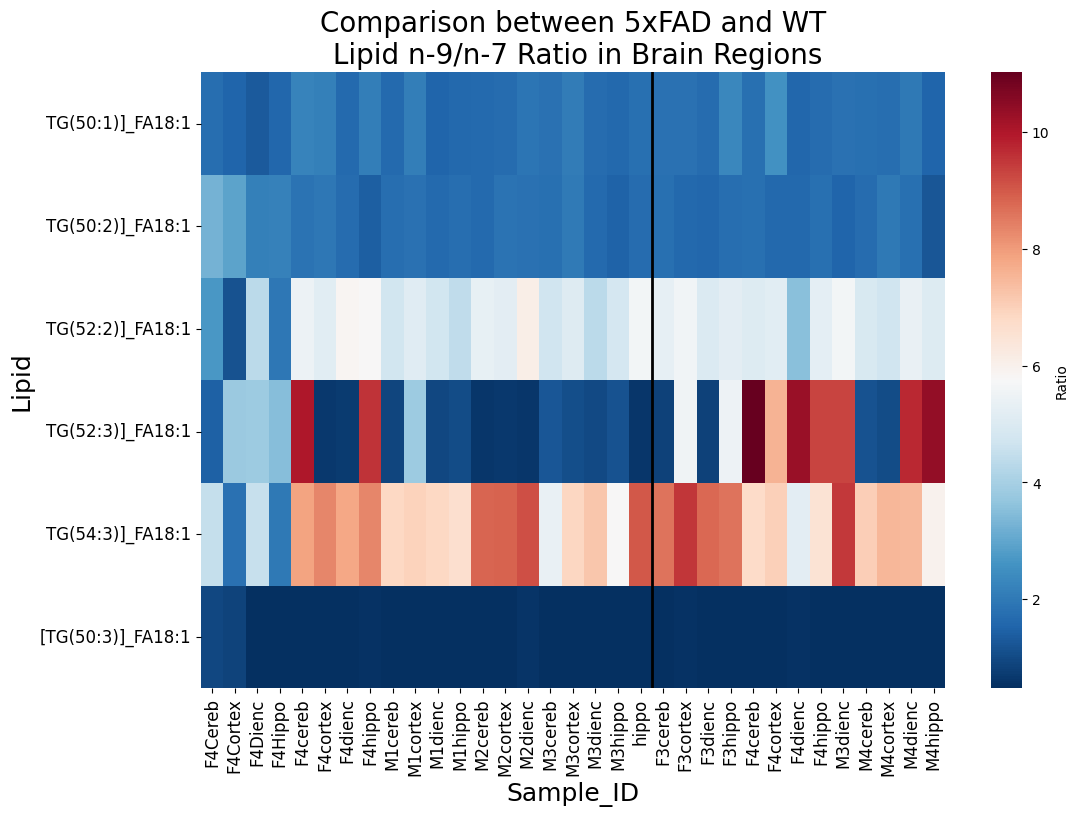

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_OzESI_5_ratio_final is already defined

def label_brain_region(sample_id):
    brain_regions = ['Cereb', 'Cortex', 'Dienc', 'Hippo']
    for region in brain_regions:
        if region.lower() in sample_id.lower():
            return region
    return ""

def label_sex(sample_id):
    sexes = ['F1', 'F2', 'F3', 'F4', 'M1', 'M2', 'M3', 'M4']
    for sex in sexes:
        if sex in sample_id:
            return sex
    return ""


# Copy df_OzESI_5_ratio_final to df_heatmap
df_heatmap = df_OzESI_5_ratio_final.copy()


df_heatmap['Brain_Region'] = df_heatmap['Sample_ID'].apply(label_brain_region)
df_heatmap['Sex'] = df_heatmap['Sample_ID'].apply(label_sex)
# Define the pattern for the regex
pattern_combined = r'(?i)(Cereb|Cortex|Dienc|Hippo|F[1-4]|M[1-4])'


df_heatmap['Sample_ID'] = df_heatmap['Sample_ID'].str.replace('-', '_')
# Remove trailing underscores from 'Sample_ID' and drop '_TG18-1_o3on'
df_heatmap['Sample_ID'] = df_heatmap['Sample_ID'].str.rstrip('_').str.replace('_TG18-1_o3on', '')

# Drop rows where Lipid contains specific values
lipids_to_drop = ['54:4', '52:4', '54:5']
pattern = '|'.join(lipids_to_drop)
df_heatmap = df_heatmap[~df_heatmap['Lipid'].str.contains(pattern, na=False)]

# Drop rows where Sample_ID is blank or NaN
df_heatmap = df_heatmap[df_heatmap['Sample_ID'].notna() & df_heatmap['Sample_ID'].ne('blank')]

# Split the dataframe into 5xFAD and WT groups
df_5xFAD = df_heatmap[df_heatmap['Sample_ID'].str.contains('5xFAD', case=False)]
df_WT = df_heatmap[df_heatmap['Sample_ID'].str.contains('WT', case=False)]

# Function to process the Sample_ID and keep only the desired parts
def process_sample_id(sample_id):
    # Replace "-" with "_"
    sample_id = sample_id.replace('-', '_')
    matches = re.findall(pattern_combined, sample_id)
    return ''.join(matches)

df_5xFAD['Sample_ID'] = df_5xFAD['Sample_ID'].apply(process_sample_id)
df_WT['Sample_ID'] = df_WT['Sample_ID'].apply(process_sample_id)

# Define a pattern to extract brain regions and the F4, F3, M1, M3, M4 parts. Making it case insensitive with `(?i)`
pattern_combined = r'(?i)(Cereb|Cortex|Dienc|Hippo|F4|F3|F2|F1|M1|M2|M3|M4|DOD93|DOD94|FAD185|FAD189)'



# # Extract desired parts and concatenate them. Ensure NaNs are replaced with empty strings.
# df_5xFAD['Sample_ID'] = df_5xFAD['Sample_ID'].str.extractall(pattern_combined).fillna('').unstack().apply(lambda x: ''.join(str(v) for v in x), axis=1)
# df_WT['Sample_ID'] = df_WT['Sample_ID'].str.extractall(pattern_combined).fillna('').unstack().apply(lambda x: ''.join(str(v) for v in x), axis=1)

# Pivot the dataframes
pivot_5xFAD = df_5xFAD.pivot_table(index=['Lipid'], columns='Sample_ID', values='Ratio')
pivot_WT = df_WT.pivot_table(index=['Lipid'], columns='Sample_ID', values='Ratio')

# Concatenate the pivoted dataframes horizontally
combined_pivot = pd.concat([pivot_5xFAD, pivot_WT], axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(combined_pivot, cmap='RdBu_r', annot=False, cbar_kws={'label': 'Ratio'}, ax=ax)
ax.axvline(len(pivot_5xFAD.columns), color='black', linewidth=2)  # Add a demarcation line
plt.title('Comparison between 5xFAD and WT\n Lipid n-9/n-7 Ratio in Brain Regions', fontsize=20)

# Adjust the x and y axis label size
ax.set_xlabel('Sample_ID', fontsize=18)
ax.set_ylabel('Lipid', fontsize=18)

# Adjust the x and y axis tick label size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# fig.savefig("Projects/04_29_23/Plots/Ratio/Brain_ratios_042923_2", dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_2985/2855623848.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2985/2855623848.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



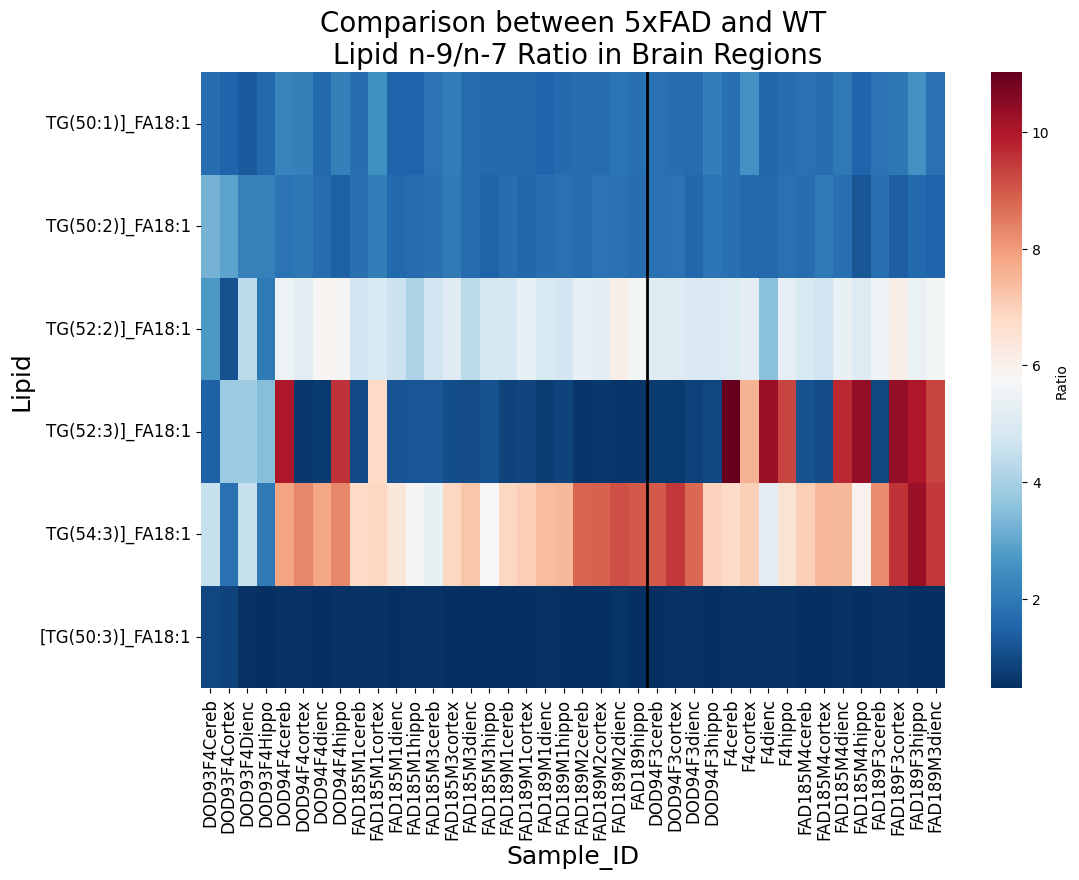

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_OzESI_5_ratio_final is already defined

# Copy df_OzESI_5_ratio_final to df_heatmap
df_heatmap = df_OzESI_5_ratio_final.copy()
df_heatmap['Sample_ID'] = df_heatmap['Sample_ID'].str.replace('-', '_')
# Remove trailing underscores from 'Sample_ID' and drop '_TG18-1_o3on'
df_heatmap['Sample_ID'] = df_heatmap['Sample_ID'].str.rstrip('_').str.replace('_TG18-1_o3on', '')

# Drop rows where Lipid contains specific values
lipids_to_drop = ['54:4', '52:4', '54:5']
pattern = '|'.join(lipids_to_drop)
df_heatmap = df_heatmap[~df_heatmap['Lipid'].str.contains(pattern, na=False)]

# Drop rows where Sample_ID is blank or NaN
df_heatmap = df_heatmap[df_heatmap['Sample_ID'].notna() & df_heatmap['Sample_ID'].ne('blank')]

# Split the dataframe into 5xFAD and WT groups
df_5xFAD = df_heatmap[df_heatmap['Sample_ID'].str.contains('5xFAD', case=False)]
df_WT = df_heatmap[df_heatmap['Sample_ID'].str.contains('WT', case=False)]

# Function to process the Sample_ID and keep only the desired parts
def process_sample_id(sample_id):
    # Replace "-" with "_"
    sample_id = sample_id.replace('-', '_')
    matches = re.findall(pattern_combined, sample_id)
    return ''.join(matches)

df_5xFAD['Sample_ID'] = df_5xFAD['Sample_ID'].apply(process_sample_id)
df_WT['Sample_ID'] = df_WT['Sample_ID'].apply(process_sample_id)

# Define a pattern to extract brain regions and the F4, F3, M1, M3, M4 parts. Making it case insensitive with `(?i)`
pattern_combined = r'(?i)(Cereb|Cortex|Dienc|Hippo|F4|F3|F2|F1|M1|M2|M3|M4|DOD93|DOD94|FAD185|FAD189)'



# # Extract desired parts and concatenate them. Ensure NaNs are replaced with empty strings.
# df_5xFAD['Sample_ID'] = df_5xFAD['Sample_ID'].str.extractall(pattern_combined).fillna('').unstack().apply(lambda x: ''.join(str(v) for v in x), axis=1)
# df_WT['Sample_ID'] = df_WT['Sample_ID'].str.extractall(pattern_combined).fillna('').unstack().apply(lambda x: ''.join(str(v) for v in x), axis=1)

# Pivot the dataframes
pivot_5xFAD = df_5xFAD.pivot_table(index=['Lipid'], columns='Sample_ID', values='Ratio')
pivot_WT = df_WT.pivot_table(index=['Lipid'], columns='Sample_ID', values='Ratio')

# Concatenate the pivoted dataframes horizontally
combined_pivot = pd.concat([pivot_5xFAD, pivot_WT], axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(combined_pivot, cmap='RdBu_r', annot=False, cbar_kws={'label': 'Ratio'}, ax=ax)
ax.axvline(len(pivot_5xFAD.columns), color='black', linewidth=2)  # Add a demarcation line
plt.title('Comparison between 5xFAD and WT\n Lipid n-9/n-7 Ratio in Brain Regions', fontsize=20)

# Adjust the x and y axis label size
ax.set_xlabel('Sample_ID', fontsize=18)
ax.set_ylabel('Lipid', fontsize=18)

# Adjust the x and y axis tick label size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# fig.savefig("Projects/04_29_23/Plots/Ratio/Brain_ratios_042923_2", dpi=300, bbox_inches='tight')
plt.show()


# Caitlin Validation CLAW vs Manual

In [18]:
# import pandas as pd

# # First dataframe
# data1 = {
#     'TG': ['TG(52:2)', 'TG(52:3)', 'TG(52:4)', 'TG(54:2)', 'TG(54:3)', 'TG(54:4)', 'TG(54:5)'],
#     'Crude': [4.23, 3.16, 3.05, 3.94, 5.81, 4.91, 4.09],
#     'Degummed': [4.31, 2.50, 2.96, 4.25, 5.75, 4.07, 3.83],
#     'RBD': [4.70, 3.07, 2.68, 3.17, 5.41, 4.97, 3.83]
# }
# df1 = pd.DataFrame(data1)

# # Second dataframe
# data2 = {
#     'TG': ['TG 52:2', 'TG 52:3', 'TG 52:4', 'TG 54:2', 'TG 54:3', 'TG 54:4', 'TG 54:5'],
#     'Crude': [4.4, 3.2, 3.1, 4.5, 5.7, 4.8, 4.1],
#     'Degummed': [4.3, 2.6, 3.1, 4.2, 5.7, 4.0, 3.4],
#     'RBD': [4.3, 2.6, 3.1, 4.2, 5.7, 4.0, 3.4]
# }
# df2 = pd.DataFrame(data2)

# print(df1)
# print(df2)


In [19]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # First dataframe with renamed columns
# CLAW_canola = {
#     'TG': ['TG(52:2)', 'TG(52:3)', 'TG(52:4)', 'TG(54:2)', 'TG(54:3)', 'TG(54:4)'],
#     'Crude': [4.23, 3.16, 3.05, 3.94, 5.81, 4.91],
#     'Degummed': [4.31, 2.50, 2.96, 4.25, 5.75, 4.07],
#     'RBD': [4.70, 3.07, 2.68, 3.17, 5.41, 4.97]
# }
# CLAW_df = pd.DataFrame(CLAW_canola)

# # Second dataframe with renamed columns
# caitlin_canola = {
#     'TG': ['TG(52:2)', 'TG(52:3)', 'TG(52:4)', 'TG(54:2)', 'TG(54:3)', 'TG(54:4)'],
#     'Crude': [4.4, 3.2, 3.1, 4.5, 5.7, 4.8],
#     'Degummed': [4.3, 2.6, 3.1, 4.2, 5.7, 4.0],
#     'RBD': [4.3, 2.6, 3.1, 4.2, 5.7, 4.0]
# }
# Caitlin_df = pd.DataFrame(caitlin_canola)

# # Scatter plots
# for column in ['Crude', 'Degummed', 'RBD']:
#     plt.figure(figsize=(10, 6))
#     plt.plot(CLAW_df['TG'], CLAW_df[column], label=f'CLAW', marker='o')
#     plt.plot(Caitlin_df['TG'], Caitlin_df[column], label=f'Manual', marker='x')
#     plt.title(f'CLAW vs Manual Processing: {column} Canola Oil')
#     plt.xlabel('TG')
#     plt.ylabel(column)
#     plt.legend()
#     plt.grid(True)
#     plt.xticks(rotation=45)
#     plt.savefig(f'CLAW_vs_Manual_{column}_Canola_Oil.png', dpi=300, bbox_inches='tight')
    
#     plt.show()


In [20]:
# columns_of_interest = ['Crude', 'Degummed', 'RBD']

# for tg_value in CLAW_df['TG']:
#     print(f"\nDifference for TG: {tg_value}")
#     for col in columns_of_interest:
#         difference = CLAW_df[CLAW_df['TG'] == tg_value][col].iloc[0] - Caitlin_df[Caitlin_df['TG'] == tg_value][col].iloc[0]
#         print(f"{col} difference: {difference:.2f}")

# # Standard deviation for each sample
# std_dev_CLAW = CLAW_df[columns_of_interest].std()
# std_dev_Caitlin = Caitlin_df[columns_of_interest].std()

# print("\nStandard Deviation for CLAW samples:")
# print(std_dev_CLAW)

# print("\nStandard Deviation for Caitlin samples:")
# print(std_dev_Caitlin)


In [21]:

# import numpy as np

# std_devs = []

# for tg_value in CLAW_df['TG']:
#     claw_crude_value = CLAW_df[CLAW_df['TG'] == tg_value]['Crude'].iloc[0]
#     caitlin_crude_value = Caitlin_df[Caitlin_df['TG'] == tg_value]['Crude'].iloc[0]
    
#     std_dev = np.std([claw_crude_value, caitlin_crude_value], ddof=1) # ddof=1 gives the sample std deviation
#     std_devs.append(std_dev)

#     print(f"Standard Deviation for TG {tg_value} in Crude sample: {std_dev:.2f}")

# # Mean of the standard deviations
# mean_std_dev = np.mean(std_devs)

# print(f"\nMean of the standard deviations for all TGs in Crude sample: {mean_std_dev:.2f}")


In [22]:
# import numpy as np

# samples = ['Crude', 'Degummed', 'RBD']

# for sample in samples:
#     std_devs = []

#     for tg_value in CLAW_df['TG']:
#         claw_value = CLAW_df[CLAW_df['TG'] == tg_value][sample].iloc[0]
#         caitlin_value = Caitlin_df[Caitlin_df['TG'] == tg_value][sample].iloc[0]
        
#         std_dev = np.std([claw_value, caitlin_value], ddof=1)  # ddof=1 gives the sample std deviation
#         std_devs.append(std_dev)

#         print(f"Standard Deviation for TG {tg_value} in {sample} sample: {std_dev:.2f}")

#     # Mean of the standard deviations for each sample type
#     mean_std_dev = np.mean(std_devs)

#     print(f"\nMean of the standard deviations for all TGs in {sample} sample: {mean_std_dev:.2f}\n")


In [23]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # First dataframe with renamed columns
# CLAW_canola = {
#     'TG': ['TG(52:2)_FA 18:1', 'TG(52:3)_FA 18:1', 'TG(52:4)_FA 18:1', 'TG(54:2)_FA 18:1', 'TG(54:3)_FA 18:1', 'TG(54:4)_FA 18:1','TG(54:5)_FA 18:1'],
#     'Crude': [4.23, 3.16, 3.05, 3.94, 5.81, 4.91,4.09],
#     'Degummed': [4.31, 2.50, 2.96, 4.25, 5.75, 4.07,3.83],
#     'RBD': [4.70, 3.07, 2.68, 3.17, 5.41, 4.97,3.83]
# }
# CLAW_df = pd.DataFrame(CLAW_canola)

# import plotly.graph_objects as go

# # Create a grouped horizontal bar chart with gradient colors
# fig = go.Figure(data=[
#     go.Bar(name='RBD', y=CLAW_df['TG'], x=CLAW_df['RBD'], orientation='h', 
#            marker=dict(color='orange', line=dict(color='darkorange', width=1), colorscale='Oranges')),
#     go.Bar(name='Degummed', y=CLAW_df['TG'], x=CLAW_df['Degummed'], orientation='h', 
#            marker=dict(color='green', line=dict(color='darkgreen', width=1), colorscale='Greens')),
#     go.Bar(name='Crude', y=CLAW_df['TG'], x=CLAW_df['Crude'], orientation='h', 
#            marker=dict(color='blue', line=dict(color='darkblue', width=1), colorscale='Blues'))
# ])

# # Change the bar mode to 'group'
# fig.update_layout(barmode='group', 
#                   title='<b>'+"Canola Oil TG Comparison Across Processing Steps" +'<b>',
#                   title_x=0.5,
#                   yaxis_title='<i>'+"Lipid Structure"+'<i>',
#                   xaxis_title='<i>'+"n-9/n-7 FA 18:1 Isomer Ratio"+'<i>',
#                   title_font_size=32,  # Increase the main title font size
#                   yaxis_title_font=dict(size=24),  # Increase y-axis title font size
#                   xaxis_title_font=dict(size=24),   # Increase x-axis title font size
#                   width=1000,
#                   height=600,
#                   legend_title_font=dict(size=24),
#                   legend_font=dict(size=20)
# )
# fig.update_yaxes(tickfont=dict(family="Arial Black", size=20))  
# fig.update_xaxes(tickfont=dict(family="Arial Black", size=20))  
# # Show the figure
# fig.show()



In [24]:
# import pymzml
# import pandas as pd
# import matplotlib.pyplot as plt

# file_path = 'Projects/canola/mzml/CrudeCanola_O3on_150gN3_02082023.mzML'
# run = pymzml.run.Reader(file_path, skip_chromatogram=False)

# time_points = []
# total_ion_counts = []



# for spectrum in run:
#     if isinstance(spectrum, pymzml.spec.Chromatogram):
#         for time, intensity in spectrum.peaks():
#             print(time, intensity)